# Next Up: Exploratory Data Analysis

## Project Overview
**Goal**: Predict which G-League players will be called up to the NBA based on performance metrics, demographics, and contextual factors.

**Target Variable**: `called_up` (binary: 1 = called up, 0 = not called up)

**Timeline**: Week 1 - Research, EDA, and Planning

---

## Learning Objectives for This Notebook
By the end of this EDA, you should be able to:
1. Understand the structure and quality of our datasets
2. Identify the distribution and characteristics of call-ups (target variable)
3. Discover patterns and relationships between features and call-ups
4. Understand data limitations and class imbalance
5. Identify which features might be most predictive
6. Plan feature engineering strategies for Week 2


## 📚 Section 0: Setup and Data Loading

**Objectives**:
- Import necessary libraries
- Load all available datasets
- Understand what data we have and what's missing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [48]:
# Load datasets
df_players = pd.read_csv('raw/gleague_players.csv')
df_rosters = pd.read_csv('raw/gleague_rosters.csv')
df_teams = pd.read_csv('raw/gleague_teams.csv')

# Load call-up data (once mentor completes it)
try:
    df_callups = pd.read_csv('data/external/callups.csv')
    print("✅ Call-up data loaded")
except FileNotFoundError:
    print("⚠️ Call-up data not yet available - check with mentor")
    df_callups = None

print(f"\nDatasets loaded:")
print(f"  - Players: {len(df_players)} records")
print(f"  - Rosters: {len(df_rosters)} records")
print(f"  - Teams: {len(df_teams)} records")
if df_callups is not None:
    print(f"  - Call-ups: {len(df_callups)} records")


⚠️ Call-up data not yet available - check with mentor

Datasets loaded:
  - Players: 441 records
  - Rosters: 443 records
  - Teams: 31 records


## 📊 Section 1: Data Quality Assessment

**Key Questions**:
- What does each dataset contain?
- How complete is our data (missing values)?
- Are there duplicates?
- What data types do we have?
- What time period does our data cover?

**Tasks**:
1. Display first few rows of each dataset
2. Check data types and info
3. Identify missing values
4. Check for duplicates
5. Understand the grain (unique keys) of each dataset


In [49]:
# TODO: Display first 5 rows of each dataset
# TODO: Check info() for each dataset
# TODO: Identify missing values with .isnull().sum()
# TODO: Check for duplicates
df_players


,player_id,full_name,position,height,weight,birthdate,college
0,0039617f-5e20-4c83-a324-da7321514927,Viktor Lakhin,C,83,247.0,2001-07-30,Clemson
1,01830f03-cbe5-4cc9-8696-03df11438921,Jazian Gortman,G,74,184.0,2003-03-14,NaN
2,28517bbb-e854-4177-9cb0-b3d60e27b658,Payton Sandfort,F,79,215.0,2002-07-12,Iowa
3,3e0258fd-74cd-4150-a990-ad10ab569ab8,Cameron Brown,F,78,225.0,2001-05-10,NaN
4,53597494-78f8-44e5-afe0-1059670f941b,Brooks Barnhizer,G,77,230.0,2002-03-02,Northwestern
...,...,...,...,...,...,...,...
436,63fc7907-6817-4ce0-982e-62aec54a0cab,Eric Dixon,F,78,255.0,2001-01-26,Villanova
437,826db458-68dc-4b84-8604-ee70083477b8,Ibou Badji,C,82,240.0,2002-10-13,NaN
438,d1315319-4751-42ea-88e6-0b707a4a08cb,Jonas Aidoo,C,83,240.0,NaN,Arkansas
439,d8450778-d9b4-425e-b33b-1e5040bcf89e,Antonio Reeves,G,77,205.0,2000-11-20,Kentucky


In [51]:
df_rosters


,team_id,team_name,player_id,player_name,position
0,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,0039617f-5e20-4c83-a324-da7321514927,Viktor Lakhin,C
1,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,01830f03-cbe5-4cc9-8696-03df11438921,Jazian Gortman,G
2,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,28517bbb-e854-4177-9cb0-b3d60e27b658,Payton Sandfort,F
3,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,3e0258fd-74cd-4150-a990-ad10ab569ab8,Cameron Brown,F
4,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,53597494-78f8-44e5-afe0-1059670f941b,Brooks Barnhizer,G
...,...,...,...,...,...
438,e74de5ce-3e98-4414-afe5-b56a90e527a2,Greensboro Swarm,63fc7907-6817-4ce0-982e-62aec54a0cab,Eric Dixon,F
439,e74de5ce-3e98-4414-afe5-b56a90e527a2,Greensboro Swarm,826db458-68dc-4b84-8604-ee70083477b8,Ibou Badji,C
440,e74de5ce-3e98-4414-afe5-b56a90e527a2,Greensboro Swarm,d1315319-4751-42ea-88e6-0b707a4a08cb,Jonas Aidoo,C
441,e74de5ce-3e98-4414-afe5-b56a90e527a2,Greensboro Swarm,d8450778-d9b4-425e-b33b-1e5040bcf89e,Antonio Reeves,G


In [52]:
df_teams

,team_id,team_name,alias
0,035ebd2d-69d9-4d73-a4b3-519f78071975,Oklahoma City Blue,OKL
1,0a3d428b-572a-4a94-b716-8c1297c53d8e,South Bay Lakers,SBL
2,0f009580-dda8-4080-aa43-5d58a17028f6,Austin Spurs,AUS
3,132ef7de-e880-4863-bf57-27894ea0f5bb,Mexico City Capitanes,MXC
4,1adf6996-af2e-41a2-b158-174b0e4c5a1d,Rip City Remix,RCR
5,36ab932e-ab25-4b82-8133-ea5aed2f6a02,Iowa Wolves,IWA
6,4e26f748-e98f-412e-9c27-f04b255e7f25,Memphis Hustle,MHU
7,80411a5b-5ac0-4297-a19d-2dff8e0b611b,San Diego Clippers,SDC
8,9b8f2022-d45f-43f8-bf02-4914b04f5aa3,Rio Grande Valley Vipers,RGV
9,b0a52b1f-878d-4987-9249-026360e0207a,Santa Cruz Warriors,SCW


## 🎯 Section 2: Target Variable Analysis (MOST IMPORTANT)

**Key Questions**:
- How many players were called up vs. not called up?
- What is the call-up rate (class balance)?
- Is there severe class imbalance we need to handle?
- What contract types are most common for call-ups?
- When do most call-ups happen?

**Why This Matters**:
- Understanding class imbalance is critical for model selection
- If call-up rate is ~20-25%, this is an imbalanced classification problem
- Need to plan for appropriate evaluation metrics (F1, precision/recall, not just accuracy)

**Tasks**:
1. Calculate call-up rate
2. Visualize the distribution of called_up (0 vs 1)
3. Analyze contract types for call-ups
4. Plot call-up timeline (if dates available)
5. Discuss implications for modeling


In [4]:
# TODO: Calculate and visualize call-up rate
# TODO: Create bar plot of called_up distribution
# TODO: Analyze contract types
# TODO: Discuss class imbalance implications


## 👥 Section 3: Player Demographics Analysis

**Key Questions**:
- What positions are most represented in G-League?
- What positions get called up most often?
- Do physical attributes (height, weight) matter?
- What colleges produce the most G-League players?
- What's the typical age/experience level?

**Why This Matters**:
- Position might be a strong predictor (e.g., centers vs guards)
- Physical attributes could indicate NBA readiness
- College pedigree might matter for recruitment

**Tasks**:
1. Analyze position distribution
2. Compare position distribution for called-up vs not-called-up players
3. Explore height and weight distributions
4. Analyze college representation
5. Calculate player ages if birthdate available


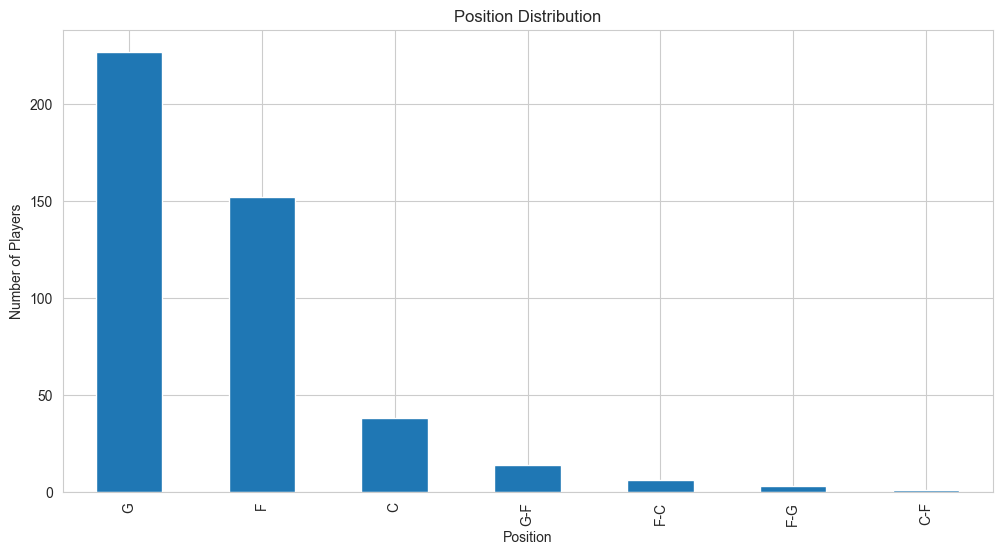

In [65]:
# TODO: Analyze position distribution
# TODO: Create visualizations comparing called-up vs not-called-up by position
# TODO: Explore height/weight distributions
# TODO: Analyze top colleges
df_players.groupby("position").size().sort_values(ascending=False).plot(
    kind="bar", 
    xlabel="Position", 
    ylabel="Number of Players", 
    title="Position Distribution"
    );

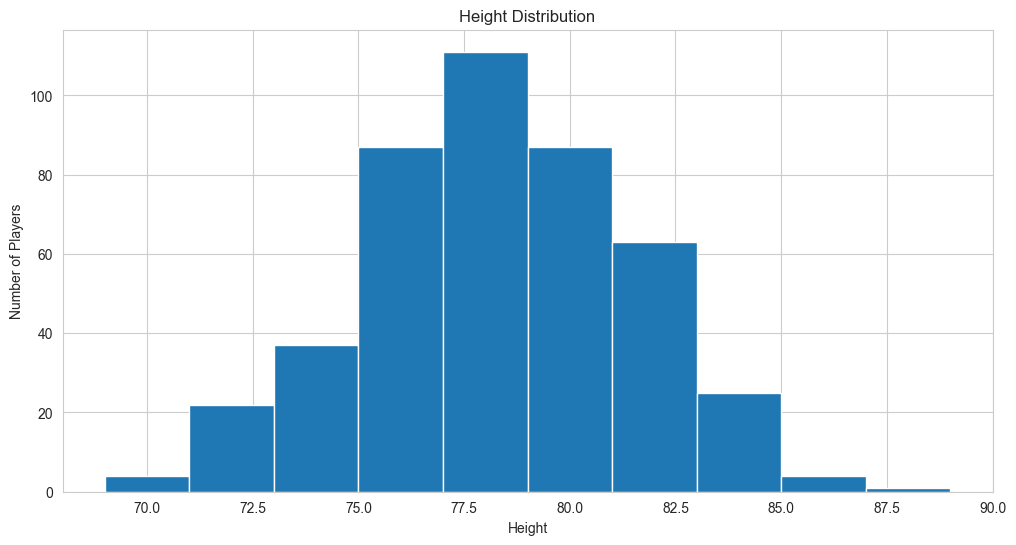

In [55]:
df_players["height"].plot(
    kind="hist", 
    xlabel="Height", 
    ylabel="Number of Players", 
    title="Height Distribution", 
    edgecolor='w'
    );

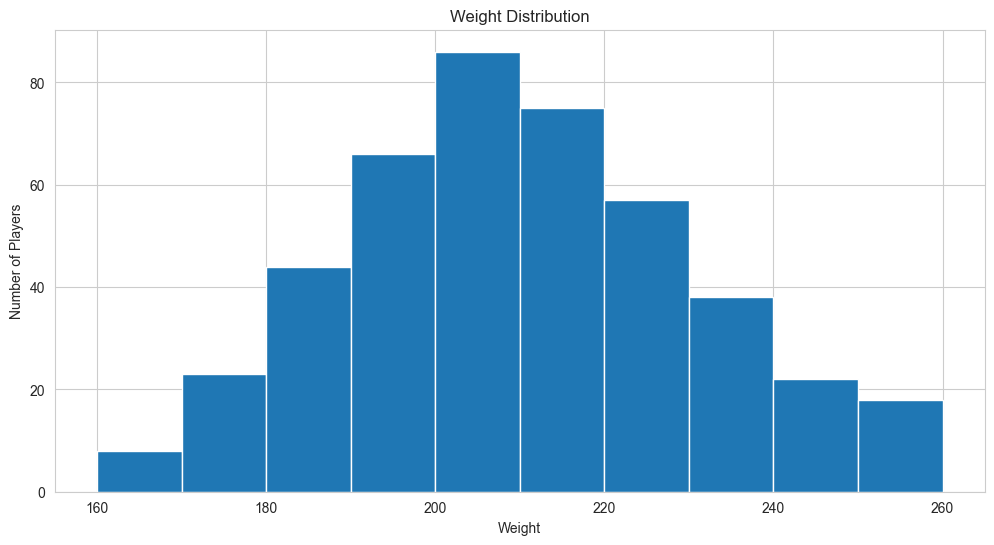

In [61]:
df_players["weight"].plot(
    kind="hist", 
    xlabel="Weight", 
    ylabel="Number of Players", 
    title="Weight Distribution", 
    edgecolor='w'
    );

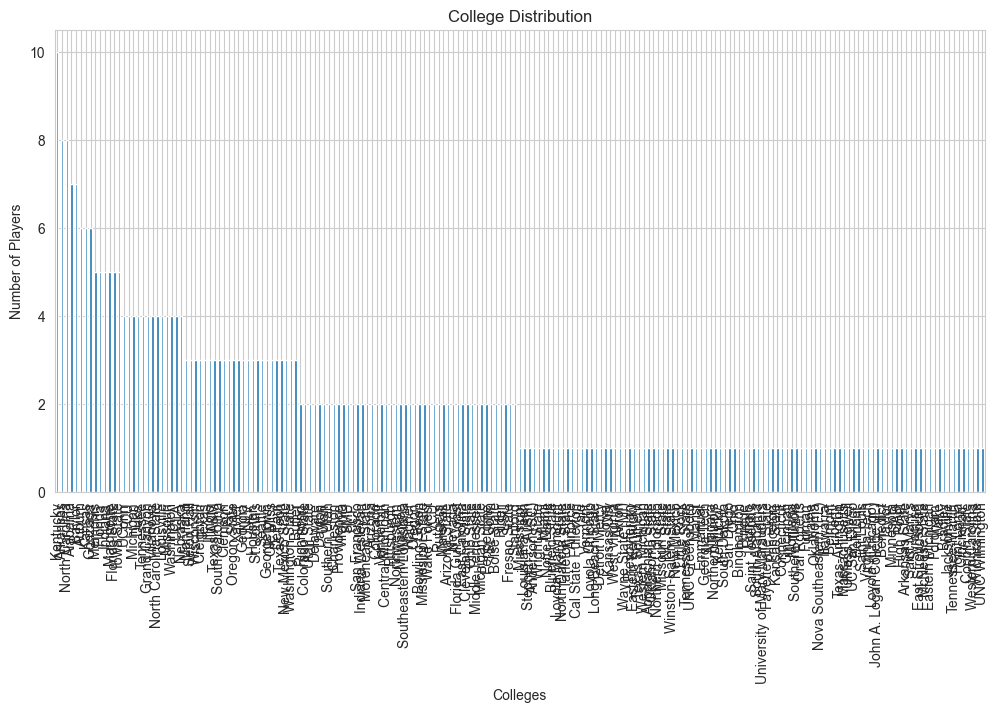

In [64]:
df_players['college'].value_counts().sort_values(ascending=False).plot(
    kind="bar", 
    xlabel="Colleges", 
    ylabel="Number of Players", 
    title="College Distribution"
    );

## 🏀 Section 4: Team-Level Analysis

**Key Questions**:
- Which G-League teams have the most players?
- Do certain teams have higher call-up rates?
- Does having an NBA affiliate matter?
- Are there geographic patterns?

**Why This Matters**:
- Some teams might have better development programs
- NBA affiliate relationship could be crucial
- Team reputation might influence call-ups

**Tasks**:
1. Analyze team distribution in rosters
2. Calculate call-up rates by team
3. Identify teams with highest/lowest call-up rates
4. Explore NBA affiliate relationships
5. Visualize team performance patterns


In [6]:
# TODO: Analyze team distributions
# TODO: Calculate call-up rates by team
# TODO: Visualize top/bottom teams for call-ups
# TODO: Explore NBA affiliate patterns


## 📈 Section 5: Feature Relationships and Correlations

**Key Questions**:
- Which features are correlated with call-ups?
- Are there strong correlations between features?
- Do certain combinations of features predict call-ups better?

**Why This Matters**:
- Identify the most promising features for modeling
- Detect multicollinearity that might affect models
- Guide feature engineering decisions

**Tasks**:
1. Create correlation matrix for numerical features
2. Identify features most correlated with target
3. Visualize relationships using scatter plots
4. Create pairplots for key features
5. Test statistical significance of relationships


In [7]:
# TODO: Create correlation heatmap
# TODO: Identify top correlated features with target
# TODO: Create scatter plots for key relationships
# TODO: Statistical tests (t-tests, chi-square)


## 🔍 Section 6: Data Limitations and Missing Features

**Key Questions**:
- What data are we missing that would be valuable?
- What's the impact of missing player statistics?
- Do we need additional data sources?
- What assumptions are we making?

**Current Limitations**:
- ⚠️ Player statistics are limited/missing (API constraint)
- ❌ No agent/agency data yet
- ❌ No NBA team roster/injury data
- ❌ No historical season-by-season data

**Tasks**:
1. Document missing data patterns
2. Assess impact of missing statistics
3. Propose additional data to collect
4. Prioritize data collection efforts
5. Plan workarounds for missing data


In [8]:
# TODO: Analyze missing data patterns
# TODO: Document limitations
# TODO: List desired additional features
# TODO: Prioritize data collection


## 💡 Section 7: Key Insights and Hypotheses

**Purpose**: Synthesize findings and form hypotheses for modeling

**Tasks**:
1. Summarize the top 5-7 key findings from EDA
2. Form hypotheses about what predicts call-ups
3. Identify potential challenges for modeling
4. Propose feature engineering ideas for Week 2

**Example Hypotheses to Test**:
- "Players at certain positions (e.g., guards) are more likely to be called up"
- "Physical attributes above NBA averages increase call-up probability"
- "Players from certain colleges have higher call-up rates"
- "Teams with direct NBA affiliates call up more players"

**Modeling Considerations**:
- Class imbalance requires special handling (SMOTE, class weights)
- May need to use F1-score, precision/recall instead of accuracy
- Cross-validation strategy (time-based split vs random)
- Feature selection will be critical given limited data


# TODO: Write up key findings
# TODO: List testable hypotheses
# TODO: Outline modeling challenges
# TODO: Propose feature engineering strategies


## 📝 Section 8: Action Items for Week 2

Based on your EDA findings, create a prioritized list of action items:

**Data Collection**:
- [ ] Collect additional player statistics (if available)
- [ ] Gather agent/agency data from HoopsHype
- [ ] Collect NBA roster and injury data
- [ ] Research historical season data

**Feature Engineering**:
- [ ] Create age feature from birthdate
- [ ] Engineer position groupings
- [ ] Create height/weight ratios
- [ ] Build team-level aggregations
- [ ] Encode categorical variables

**Data Cleaning**:
- [ ] Handle missing values (imputation strategy)
- [ ] Remove duplicates
- [ ] Standardize naming conventions
- [ ] Create merged master dataset

**Modeling Preparation**:
- [ ] Define train/test split strategy
- [ ] Plan for class imbalance handling
- [ ] Select initial feature set
- [ ] Choose evaluation metrics


---

## 🎯 Week 1 Deliverables Checklist

Before moving to Week 2, ensure you have:

- [ ] **Completed EDA**: All sections analyzed with visualizations
- [ ] **Data Quality Report**: Missing values, duplicates, data types documented
- [ ] **Target Analysis**: Call-up rate calculated, class imbalance understood
- [ ] **Key Insights**: Top 5-7 findings documented
- [ ] **Hypotheses**: At least 3-5 testable hypotheses formed
- [ ] **Limitations**: Data gaps and missing features identified
- [ ] **Week 2 Plan**: Prioritized list of feature engineering tasks
- [ ] **Team Discussion**: Findings shared and discussed with team

---

## 📚 Additional Resources

- **Basketball Reference**: For additional G-League stats
- **RealGM**: For transaction and agent data
- **HoopsHype**: For agent affiliations
- **Imbalanced-learn documentation**: For handling class imbalance
- **SHAP documentation**: For model interpretation planning

---

**Next Steps**: Move to feature engineering (Week 2) once call-up data is collected and EDA is complete!
